# LinkedIn Connections Data Analysis (In progress)

In [178]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

In [179]:
df = pd.read_csv("Connections.csv")

In [180]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     3735 non-null   object
 1   Last Name      3735 non-null   object
 2   Email Address  91 non-null     object
 3   Company        3650 non-null   object
 4   Position       3651 non-null   object
 5   Connected On   3783 non-null   object
dtypes: object(6)
memory usage: 177.5+ KB


,First Name,Last Name,Email Address,Company,Position,Connected On
0,Kaitlin,Rasborn,NaN,Delta Gamma,President,2022-04-12
1,Emma,Woerle,NaN,Rochester Jr. Americans,Communications Intern,2022-04-12
2,Vinay,Jain,vj6810@g.rit.edu,Retail Business Services,Data Engineer,2022-04-12
3,Aniket,Shukla,NaN,Gorbel Inc.,Data Scientist,2022-04-12
4,Ishika,Prasad,NaN,Motive,Strategic Analyst,2022-04-11
...,...,...,...,...,...,...
3778,Pankaj,Jain,NaN,Reliance Industries Limited,"Head - Domestic Feedstock, Petrochemicals",2016-03-12
3779,Jatin,Nayak,NaN,Kalaari Capital,Venture Capital Fellow,2016-03-11
3780,Dr. Arjita,Jain,NaN,NCRD Sterling Institute of Management Studies,Professor,2016-03-11
3781,Sanjay,"Patel, P.Eng.",NaN,Wood,Senior Process Engineer,2016-03-10


In [181]:
df = (
    df
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%Y-%m-%d')
  )
df.head()

,company,position,connected_on
0,Delta Gamma,President,2022-04-12
1,Rochester Jr. Americans,Communications Intern,2022-04-12
2,Retail Business Services,Data Engineer,2022-04-12
3,Gorbel Inc.,Data Scientist,2022-04-12
4,Motive,Strategic Analyst,2022-04-11


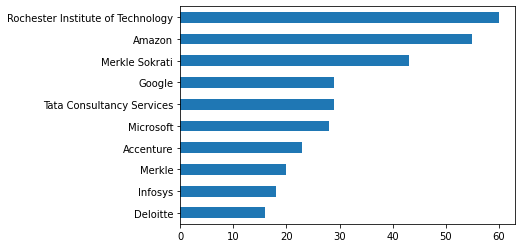

In [182]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis()

In [183]:
pattern = "freelance|self-employed"
df = df[~df['company'].str.contains(pattern, case=False)]

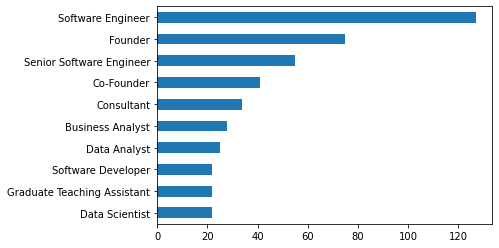

In [184]:
df['position'].value_counts().head(10).plot(kind="barh").invert_yaxis()

<AxesSubplot:>

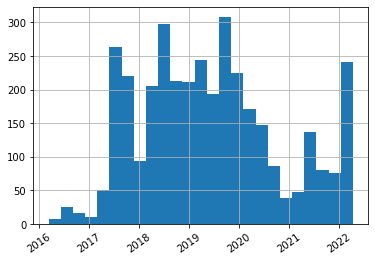

In [185]:
df['connected_on'].hist(xrot=35, bins=25)

In [186]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)

,company,count
0,Rochester Institute of Technology,60
1,Amazon,55
2,Merkle Sokrati,43
3,Google,29
4,Tata Consultancy Services,29
5,Microsoft,28
6,Accenture,23
7,Merkle,20
8,Infosys,18
9,ZS,16


In [187]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,Software Engineer,127
1,Founder,75
2,Senior Software Engineer,55
3,Co-Founder,41
4,Consultant,34
5,Business Analyst,28
6,Data Analyst,25
7,Software Developer,22
8,Graduate Teaching Assistant,22
9,Data Scientist,22


In [188]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(2649, 2)
(53, 2)


In [189]:
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)

(2133, 2)
(86, 2)


In [190]:
g = nx.Graph()
g.add_node('root')

for _, row in df_company_reduced.iterrows():
  company = row['company']
  count = row['count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in df[company == df['company']]['position']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#BF0C2F')
  g.add_edge('root', company, color='black')

nt = net.Network(height='100%', width='100%', bgcolor="white", font_color='black')
nt.from_nx(g)
nt.hrepulsion(node_distance=150,central_gravity=0,spring_length=200,spring_strength=0.001,damping=0.1)
nt.show('company_graph.html')
display(HTML('company_graph.html'))

In [191]:
g = nx.Graph()
g.add_node('root')

for _, row in df_position_reduced.iterrows():

  count = f"{row['count']}"
  position= row['position']
  
  g.add_node(position, size=count, color='#BF0C2F', title=count)
  g.add_edge('root', position, color='grey')

nt = net.Network(height='100%', width='100%', bgcolor="white", font_color='black')
nt.from_nx(g)
nt.hrepulsion(node_distance=130,central_gravity=0,spring_length=200,spring_strength=0.001,damping=0.1)
nt.show('position_graph.html')
display(HTML('position_graph.html'))